In [44]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import hstack
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score



import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
from google.colab import files

uploaded = files.upload()

Saving Article_views.csv to Article_views.csv


In [3]:
import io
data = io.BytesIO(uploaded['Article_views.csv'])

In [4]:
#read data with pandas
df = pd.read_csv(data)
df.head()

,Unnamed: 0,category,url,author,title,content,views
0,0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405
1,1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381
2,2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319
3,3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266
4,4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df

,category,url,author,title,content,views
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320
...,...,...,...,...,...,...
11695,travel_and_leisure,https://articlebiz.com/article/1052050315-10-o...,Alex Belsey,10 Of The Best Places To Visit On A European R...,"[<p>\n<a href=""https://articlebiz.com/category...",271
11696,travel_and_leisure,https://articlebiz.com/article/1052048720-clea...,Rick,"""Clear Vision in Liverpool-Knowsley-Merseyside...","[<p>\n<a href=""https://articlebiz.com/category...",257
11697,travel_and_leisure,https://articlebiz.com/article/1052048506-hot-...,Andrew Lang,"Hot Dog, Jumping Frog: Things to See and Do in...","[<p>\n<a href=""https://articlebiz.com/category...",223
11698,travel_and_leisure,https://articlebiz.com/article/1052048496-what...,Andrew Lang,What are the More Obscure Places to Visit in S...,"[<p>\n<a href=""https://articlebiz.com/category...",270


In [7]:
df.shape

(11700, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  11700 non-null  object
 1   url       11700 non-null  object
 2   author    11700 non-null  object
 3   title     11700 non-null  object
 4   content   11700 non-null  object
 5   views     11700 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 548.6+ KB


In [9]:
df.describe()

,views
count,11700.000000
mean,313.083333
std,242.520564
min,44.000000
25%,168.000000
50%,248.000000
75%,392.000000
max,2301.000000


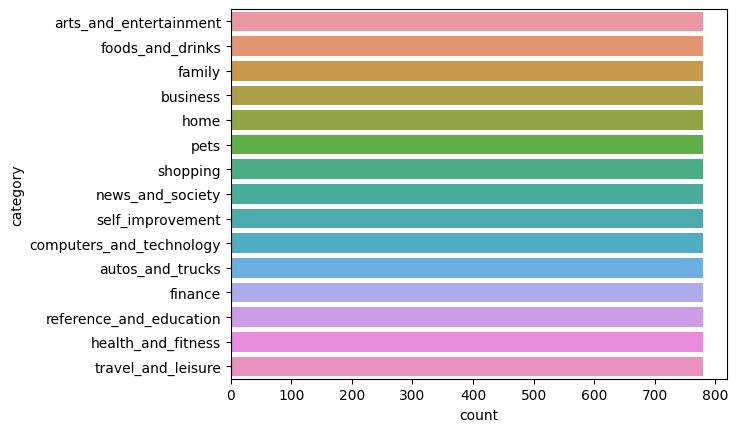

In [10]:
sns.countplot(y = df['category']);

In [11]:
def clean_content(column):
    # Create a BeautifulSoup object
    soup = BeautifulSoup(column, 'html.parser')

    # Find all the <p> tags and extract their text
    paragraphs = soup.find_all('p')
    cleaned_text = [p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True) != "There are no posted comments."]

    # Join the cleaned text into a single string
    cleaned_content = ' '.join(cleaned_text)

    return cleaned_content


In [12]:
#apply function to cean the content
df['cleaned_content'] = df['content'].apply(clean_content)


In [13]:
#concatenating the title and content column into a new column so that it can be preprocessed at once

df['full_article'] = df['title'].astype(str) + ' ' + df['cleaned_content'].astype(str)

In [14]:
df

,category,url,author,title,content,views,cleaned_content,full_article
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...
...,...,...,...,...,...,...,...,...
11695,travel_and_leisure,https://articlebiz.com/article/1052050315-10-o...,Alex Belsey,10 Of The Best Places To Visit On A European R...,"[<p>\n<a href=""https://articlebiz.com/category...",271,Travel & Leisure→Vacation Plans Europe is a di...,10 Of The Best Places To Visit On A European R...
11696,travel_and_leisure,https://articlebiz.com/article/1052048720-clea...,Rick,"""Clear Vision in Liverpool-Knowsley-Merseyside...","[<p>\n<a href=""https://articlebiz.com/category...",257,Travel & Leisure→Travel Tips Clear Vision in L...,"""Clear Vision in Liverpool-Knowsley-Merseyside..."
11697,travel_and_leisure,https://articlebiz.com/article/1052048506-hot-...,Andrew Lang,"Hot Dog, Jumping Frog: Things to See and Do in...","[<p>\n<a href=""https://articlebiz.com/category...",223,"Travel & Leisure→Travel Spot Ah, Albuquerque, ...","Hot Dog, Jumping Frog: Things to See and Do in..."
11698,travel_and_leisure,https://articlebiz.com/article/1052048496-what...,Andrew Lang,What are the More Obscure Places to Visit in S...,"[<p>\n<a href=""https://articlebiz.com/category...",270,"Travel & Leisure→Travel Spot G'day, mates! Wel...",What are the More Obscure Places to Visit in S...


In [15]:
#function to clean (standardize) data by removing extraneous characters making it easier to tokenize
def clean_data(data):
    cleaned = []
    for word in data:
        #Convert to lowercase
        word = str(word).lower()
        #get rid of urls
        word = re.sub('https?://\S+|www\.\S+<[^<]+?>', '', word)
        # get rid of non words and extra spaces
        word = re.sub('\\W', ' ', word)
        word = re.sub('\n', '', word)
        word = re.sub(' +', ' ', word)
        word = re.sub('^ ', '', word)
        word = re.sub(' $', '', word)
        cleaned.append(word)
    return cleaned

In [16]:
df['cleaned_full_article'] = clean_data(df['full_article'])

In [17]:
df.head()

,category,url,author,title,content,views,cleaned_content,full_article,cleaned_full_article
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...,the marvelous world of cigar box guitars a tes...
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...,how to shoot better product photography arts e...
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...,a beginner s guide to pottery clay getting sta...
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...,the evolution of taylor swifts fashion 8 iconi...
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...,acoustics doesn t matter arts entertainment la...


In [18]:
#tokenize text
df['tokenized_article'] = df['cleaned_full_article'].apply(nltk.tokenize.word_tokenize)
df.head()

,category,url,author,title,content,views,cleaned_content,full_article,cleaned_full_article,tokenized_article
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...,the marvelous world of cigar box guitars a tes...,"[the, marvelous, world, of, cigar, box, guitar..."
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...,how to shoot better product photography arts e...,"[how, to, shoot, better, product, photography,..."
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...,a beginner s guide to pottery clay getting sta...,"[a, beginner, s, guide, to, pottery, clay, get..."
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...,the evolution of taylor swifts fashion 8 iconi...,"[the, evolution, of, taylor, swifts, fashion, ..."
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...,acoustics doesn t matter arts entertainment la...,"[acoustics, doesn, t, matter, arts, entertainm..."


In [19]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_contents = df['tokenized_article']

# Create an empty list to store the lemmatized contents
lemmatized_contents = []

# Apply lemmatization to each token in each row
for row in tokenized_contents:
    lemmatized_row = [lemmatizer.lemmatize(token) for token in row]
    lemmatized_contents.append(lemmatized_row)

# Assign the lemmatized contents to a new column
df['lemmatized_article'] = lemmatized_contents

df.head()


,category,url,author,title,content,views,cleaned_content,full_article,cleaned_full_article,tokenized_article,lemmatized_article
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...,the marvelous world of cigar box guitars a tes...,"[the, marvelous, world, of, cigar, box, guitar...","[the, marvelous, world, of, cigar, box, guitar..."
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...,how to shoot better product photography arts e...,"[how, to, shoot, better, product, photography,...","[how, to, shoot, better, product, photography,..."
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...,a beginner s guide to pottery clay getting sta...,"[a, beginner, s, guide, to, pottery, clay, get...","[a, beginner, s, guide, to, pottery, clay, get..."
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...,the evolution of taylor swifts fashion 8 iconi...,"[the, evolution, of, taylor, swifts, fashion, ...","[the, evolution, of, taylor, swift, fashion, 8..."
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...,acoustics doesn t matter arts entertainment la...,"[acoustics, doesn, t, matter, arts, entertainm...","[acoustic, doesn, t, matter, art, entertainmen..."


In [20]:
df['lemmatized_article'][52]

['why',
 'are',
 'character',
 'so',
 'important',
 'in',
 'fantasy',
 'novel',
 'art',
 'entertainment',
 'book',
 'music',
 'character',
 'many',
 'fantasy',
 'novel',
 'feature',
 'complex',
 'and',
 'memorable',
 'character',
 'who',
 'can',
 'be',
 'relatable',
 'and',
 'inspiring',
 'character',
 'who',
 'stick',
 'with',
 'the',
 'reader',
 'long',
 'after',
 'they',
 've',
 'finished',
 'a',
 'work',
 'of',
 'fantasy',
 'literature',
 'are',
 'one',
 'of',
 'the',
 'genre',
 's',
 'most',
 'lasting',
 'quality',
 'character',
 'in',
 'fantasy',
 'literature',
 'are',
 'often',
 'deep',
 'and',
 'multi',
 'dimensional',
 'ranging',
 'from',
 'noble',
 'protagonist',
 'to',
 'devious',
 'antagonist',
 'this',
 'provides',
 'reader',
 'with',
 'the',
 'ability',
 'to',
 'connect',
 'with',
 'a',
 'diverse',
 'array',
 'of',
 'persona',
 'and',
 'reason',
 'for',
 'their',
 'action',
 'these',
 'people',
 'are',
 'some',
 'of',
 'the',
 'most',
 'lasting',
 'and',
 'well',
 'loved'

WORD COUNT

In [21]:
def count_words(df):
    df['word_count'] = df['lemmatized_article'].apply(lambda x: len(x))
    return df


In [22]:
count_words(df)

,category,url,author,title,content,views,cleaned_content,full_article,cleaned_full_article,tokenized_article,lemmatized_article,word_count
0,arts_and_entertainment,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...,the marvelous world of cigar box guitars a tes...,"[the, marvelous, world, of, cigar, box, guitar...","[the, marvelous, world, of, cigar, box, guitar...",821
1,arts_and_entertainment,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...,how to shoot better product photography arts e...,"[how, to, shoot, better, product, photography,...","[how, to, shoot, better, product, photography,...",922
2,arts_and_entertainment,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...,a beginner s guide to pottery clay getting sta...,"[a, beginner, s, guide, to, pottery, clay, get...","[a, beginner, s, guide, to, pottery, clay, get...",711
3,arts_and_entertainment,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...,the evolution of taylor swifts fashion 8 iconi...,"[the, evolution, of, taylor, swifts, fashion, ...","[the, evolution, of, taylor, swift, fashion, 8...",1756
4,arts_and_entertainment,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...,acoustics doesn t matter arts entertainment la...,"[acoustics, doesn, t, matter, arts, entertainm...","[acoustic, doesn, t, matter, art, entertainmen...",946
...,...,...,...,...,...,...,...,...,...,...,...,...
11695,travel_and_leisure,https://articlebiz.com/article/1052050315-10-o...,Alex Belsey,10 Of The Best Places To Visit On A European R...,"[<p>\n<a href=""https://articlebiz.com/category...",271,Travel & Leisure→Vacation Plans Europe is a di...,10 Of The Best Places To Visit On A European R...,10 of the best places to visit on a european r...,"[10, of, the, best, places, to, visit, on, a, ...","[10, of, the, best, place, to, visit, on, a, e...",906
11696,travel_and_leisure,https://articlebiz.com/article/1052048720-clea...,Rick,"""Clear Vision in Liverpool-Knowsley-Merseyside...","[<p>\n<a href=""https://articlebiz.com/category...",257,Travel & Leisure→Travel Tips Clear Vision in L...,"""Clear Vision in Liverpool-Knowsley-Merseyside...",clear vision in liverpool knowsley merseyside ...,"[clear, vision, in, liverpool, knowsley, merse...","[clear, vision, in, liverpool, knowsley, merse...",349
11697,travel_and_leisure,https://articlebiz.com/article/1052048506-hot-...,Andrew Lang,"Hot Dog, Jumping Frog: Things to See and Do in...","[<p>\n<a href=""https://articlebiz.com/category...",223,"Travel & Leisure→Travel Spot Ah, Albuquerque, ...","Hot Dog, Jumping Frog: Things to See and Do in...",hot dog jumping frog things to see and do in a...,"[hot, dog, jumping, frog, things, to, see, and...","[hot, dog, jumping, frog, thing, to, see, and,...",956
11698,travel_and_leisure,https://articlebiz.com/article/1052048496-what...,Andrew Lang,What are the More Obscure Places to Visit in S...,"[<p>\n<a href=""https://articlebiz.com/category...",270,"Travel & Leisure→Travel Spo

In [23]:
#maximum word count
df['word_count'].max()

7039

In [24]:
#minimum word count
df['word_count'].min()

311

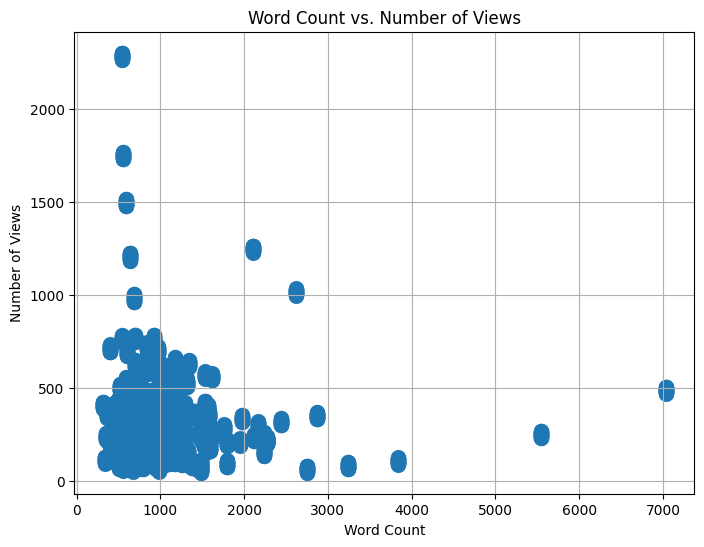

In [25]:
# Plot word count against number of views
plt.figure(figsize=(8, 6))
plt.scatter(df['word_count'], df['views'], s=100, alpha=0.8)
plt.xlabel('Word Count')
plt.ylabel('Number of Views')
plt.title('Word Count vs. Number of Views')
plt.grid(True)
plt.show()

In [45]:
#encode categories

encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df.head()

,category,url,author,title,content,views,cleaned_content,full_article,cleaned_full_article,tokenized_article,lemmatized_article,word_count
0,0,https://articlebiz.com/article/1052085015-the-...,Leon Colbert,The Marvelous World of Cigar Box Guitars: A Te...,"[<p>\n<a href=""https://articlebiz.com/category...",405,Arts & Entertainment→Books & Music Introductio...,The Marvelous World of Cigar Box Guitars: A Te...,the marvelous world of cigar box guitars a tes...,"[the, marvelous, world, of, cigar, box, guitar...","[the, marvelous, world, of, cigar, box, guitar...",821
1,0,https://articlebiz.com/article/1052084278-how-...,Ann Liu,How to Shoot Better Product Photography?,"[<p>\n<a href=""https://articlebiz.com/category...",381,Arts & Entertainment When it comes to shooting...,How to Shoot Better Product Photography? Arts ...,how to shoot better product photography arts e...,"[how, to, shoot, better, product, photography,...","[how, to, shoot, better, product, photography,...",922
2,0,https://articlebiz.com/article/1052083736-a-be...,Ann Liu,A Beginner's Guide to Pottery Clay: Getting St...,"[<p>\n<a href=""https://articlebiz.com/category...",319,Arts & Entertainment Welcome to the world of p...,A Beginner's Guide to Pottery Clay: Getting St...,a beginner s guide to pottery clay getting sta...,"[a, beginner, s, guide, to, pottery, clay, get...","[a, beginner, s, guide, to, pottery, clay, get...",711
3,0,https://articlebiz.com/article/1052076339-the-...,Cornelius Hart,The Evolution of Taylor Swifts Fashion: 8 Icon...,"[<p>\n<a href=""https://articlebiz.com/category...",266,Arts & Entertainment Taylor Swift is not only ...,The Evolution of Taylor Swifts Fashion: 8 Icon...,the evolution of taylor swifts fashion 8 iconi...,"[the, evolution, of, taylor, swifts, fashion, ...","[the, evolution, of, taylor, swift, fashion, 8...",1756
4,0,https://articlebiz.com/article/1052071386-acou...,Spencer Miles,Acoustics Doesn't Matter?,"[<p>\n<a href=""https://articlebiz.com/category...",320,Arts & Entertainment Lancaster Pennsylvania is...,Acoustics Doesn't Matter? Arts & Entertainment...,acoustics doesn t matter arts entertainment la...,"[acoustics, doesn, t, matter, arts, entertainm...","[acoustic, doesn, t, matter, art, entertainmen...",946


In [47]:
df['category'].value_counts()

0     780
6     780
4     780
2     780
8     780
10    780
13    780
9     780
12    780
3     780
1     780
5     780
11    780
7     780
14    780
Name: category, dtype: int64

In [62]:
x = df[['cleaned_full_article', 'category', 'word_count']]
y = df['views']

In [63]:
x

,cleaned_full_article,category,word_count
0,the marvelous world of cigar box guitars a tes...,0,821
1,how to shoot better product photography arts e...,0,922
2,a beginner s guide to pottery clay getting sta...,0,711
3,the evolution of taylor swifts fashion 8 iconi...,0,1756
4,acoustics doesn t matter arts entertainment la...,0,946
...,...,...,...
11695,10 of the best places to visit on a european r...,14,906
11696,clear vision in liverpool knowsley merseyside ...,14,349
11697,hot dog jumping frog things to see and do in a...,14,956
11698,what are the more obscure places to visit in s...,14,964


In [57]:

x_text = df['cleaned_full_article']
x_word_count = df['word_count']
x_category = df['category']
y = df['views']


In [66]:
x_text = df['cleaned_full_article']

# Convert the textual data into a feature vector using TF-IDF vectorizer.
vectorizer = TfidfVectorizer()
x_text_tfidf = vectorizer.fit_transform(x_text)



In [67]:
# Create a DataFrame to combine the transformed TF-IDF vectors with the other columns
x_df = pd.DataFrame(x_text_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Add the 'category' and 'word_count' columns to the new DataFrame
x_df['category'] = df['category']
x_df['word_count'] = df['word_count']

In [69]:

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state=40)

In [70]:
#reshaping the target values
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [71]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the training data
scaled_y_train = scaler.fit_transform(y_train)

# Transform the testing data using the fitted scaler
scaled_y_test = scaler.transform(y_test)


# Convert the scaled arrays back to dataframes
y_train = pd.DataFrame(scaled_y_train, columns = ['views'])
y_test = pd.DataFrame(scaled_y_test, columns = ['views'])



In [72]:
y_train.head()

,views
0,-0.666853
1,-0.266804
2,0.466619
3,-0.045944
4,-0.979391


# MODEL TRAINING

In [73]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_pred = rf_reg.predict(x_test)
r2 = r2_score(y_test, rf_pred)

In [74]:
r2

0.9978636577335431

Performance Metrics

In [75]:
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared = False)


print('MAE =', mae)
print('MSE =', mse)
print('RMSE =', rmse)

MAE = 0.041947420367815826
MSE = 0.0023636136369178085
RMSE = 0.048617009748829765


Having low values for MAE, MSE, and RMSE is a positive sign, suggesting that the model is performing well in its predictions

overall,

Predicting views can result in greater income generation for websites that rely on advertising or affiliate marketing. High-traffic articles provide more ad revenue since they generate more ad impressions and clicks.

Content Strategy: Website owners and content producers can improve their content strategy by researching what subjects or article types tend to garner more views. They can concentrate on writing more articles in the genres that are most likely to be read, which will improve traffic and interaction.

Resource Allocation: For resource allocation, predicting article popularity is helpful. It might take a lot of time and money to create content. Content producers can more effectively spend their resources by making predictions about which articles will perform better, ensuring that high-potential themes get the attention they deserve.